### Analyse exp results

In [1]:
import os
exp_dir = './results/'
exp_names = os.listdir(exp_dir)


In [2]:
import pandas as pd
exp_df = pd.concat([pd.read_csv(exp_dir + exp_name) for exp_name in exp_names]).drop(columns=['Unnamed: 0'])
print("Shape{}".format(exp_df.shape))

def erase_digits(input_string):
    return ''.join([i for i in input_string if not i.isdigit()])

exp_df['graph_family'] = exp_df['input_graph'].apply(erase_digits)

exp_df.head()

Shape(2000, 6)


,exp_duration,input_graph,qty_edges,qty_merges,qty_nodes,qty_threads,graph_family
0,0.009462,estrella100,99.0,0.0,100.0,1,estrella
1,0.017060,estrella100,99.0,53.0,100.0,5,estrella
2,0.022236,estrella100,99.0,72.0,100.0,15,estrella
3,0.026770,estrella100,99.0,76.0,100.0,30,estrella
4,0.010258,estrella200,199.0,0.0,200.0,1,estrella


## Coeficiente de variacion (CV):
### CV(x) = stdev(x) / mean(x)

In [3]:
coefficients_of_variation_df = exp_df.groupby(['input_graph', 'graph_family', 'qty_edges', 'qty_nodes', 'qty_threads']).agg(['mean', 'std'])
coefficients_of_variation_df = coefficients_of_variation_df.reset_index()
coefficients_of_variation_df.head()

input_graph graph_family qty_edges qty_nodes qty_threads exp_duration  \
                                                                   mean   
0    arbol100        arbol      99.0     100.0           1     0.005783   
1    arbol100        arbol      99.0     100.0           5     0.008403   
2    arbol100        arbol      99.0     100.0          15     0.009204   
3    arbol100        arbol      99.0     100.0          30     0.012378   
4   arbol1000        arbol     999.0    1000.0           1     0.021197   

            qty_merges            
        std       mean       std  
0  0.002178        0.0  0.000000  
1  0.001967       51.1  4.332051  
2  0.002287       67.7  4.571652  
3  0.002211       70.8  5.245104  
4  0.004500        0.0  0.000000

#### CV(tiempo) para mismo grafo

In [4]:
coefficients_of_variation_df['exp_duration_cv'] = coefficients_of_variation_df['exp_duration']['std'] / coefficients_of_variation_df['exp_duration']['mean']
coefficients_of_variation_df.head()

input_graph graph_family qty_edges qty_nodes qty_threads exp_duration  \
                                                                   mean   
0    arbol100        arbol      99.0     100.0           1     0.005783   
1    arbol100        arbol      99.0     100.0           5     0.008403   
2    arbol100        arbol      99.0     100.0          15     0.009204   
3    arbol100        arbol      99.0     100.0          30     0.012378   
4   arbol1000        arbol     999.0    1000.0           1     0.021197   

            qty_merges           exp_duration_cv  
        std       mean       std                  
0  0.002178        0.0  0.000000        0.376583  
1  0.001967       51.1  4.332051        0.234035  
2  0.002287       67.7  4.571652        0.248510  
3  0.002211       70.8  5.245104        0.178625  
4  0.004500        0.0  0.000000        0.212310

#### CV(qty_merges) para mismo grafo

In [5]:
coefficients_of_variation_df['qty_merges_cv'] = coefficients_of_variation_df['qty_merges']['std'] / coefficients_of_variation_df['qty_merges']['mean']
coefficients_of_variation_df.head()

input_graph graph_family qty_edges qty_nodes qty_threads exp_duration  \
                                                                   mean   
0    arbol100        arbol      99.0     100.0           1     0.005783   
1    arbol100        arbol      99.0     100.0           5     0.008403   
2    arbol100        arbol      99.0     100.0          15     0.009204   
3    arbol100        arbol      99.0     100.0          30     0.012378   
4   arbol1000        arbol     999.0    1000.0           1     0.021197   

            qty_merges           exp_duration_cv qty_merges_cv  
        std       mean       std                                
0  0.002178        0.0  0.000000        0.376583           NaN  
1  0.001967       51.1  4.332051        0.234035      0.084776  
2  0.002287       67.7  4.571652        0.248510      0.067528  
3  0.002211       70.8  5.245104        0.178625      0.074083  
4  0.004500        0.0  0.000000        0.212310           NaN

### Plots de CV

In [9]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

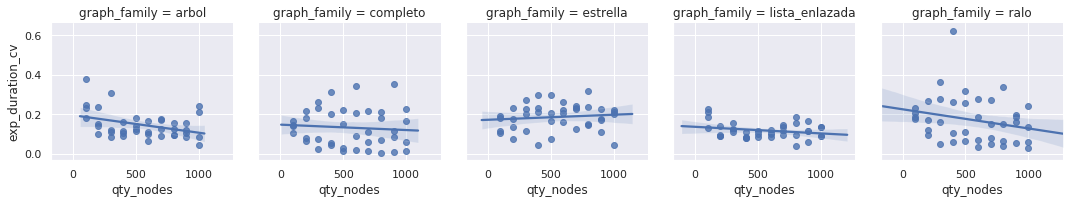

In [44]:
g = sns.FacetGrid(coefficients_of_variation_df, col="graph_family")
g = (g.map(sns.regplot, "qty_nodes", "exp_duration_cv")
     .add_legend())
g.savefig("./plots/coeficiente_variacion_time_vs_qty_nodes.png")

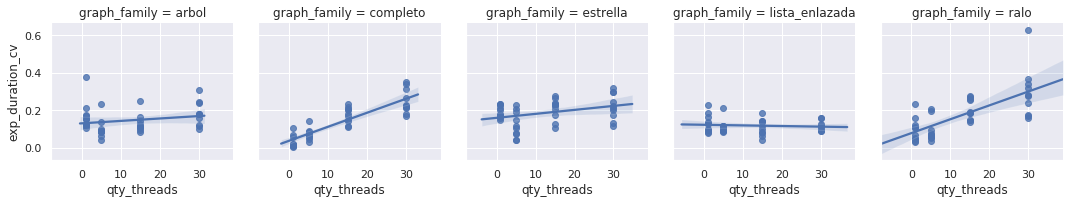

In [45]:
g = sns.FacetGrid(coefficients_of_variation_df, col="graph_family")
g = (g.map(sns.regplot, "qty_threads", "exp_duration_cv")
     .add_legend())
g.savefig("./plots/coeficiente_variacion_time_vs_qty_threads.png")

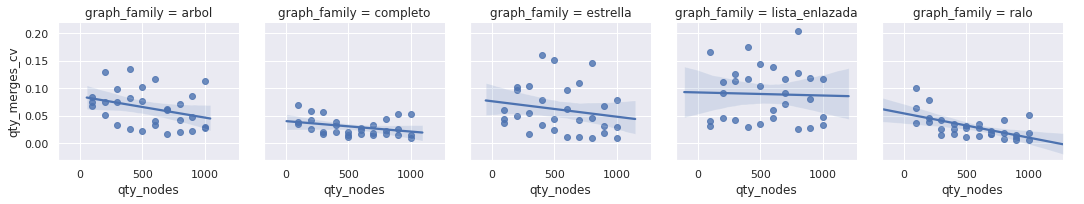

In [46]:
g = sns.FacetGrid(coefficients_of_variation_df, col="graph_family")
g = (g.map(sns.regplot, "qty_nodes", "qty_merges_cv")
     .add_legend())
g.savefig("./plots/coeficiente_variacion_qty_merges_vs_qty_nodes.png")

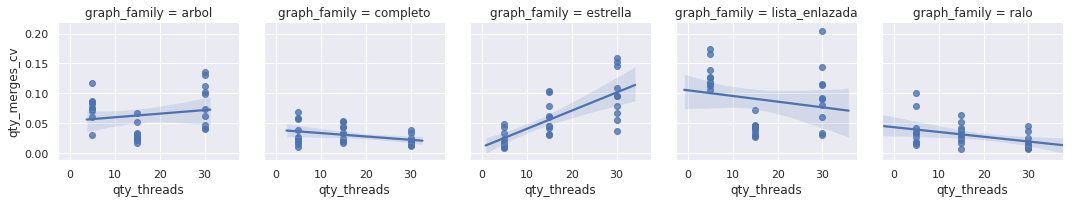

In [47]:
g = sns.FacetGrid(coefficients_of_variation_df, col="graph_family")
g = (g.map(sns.regplot, "qty_threads", "qty_merges_cv")
     .add_legend())
g.savefig("./plots/coeficiente_variacion_qty_merges_vs_qty_threads.png")

### tiempo vs qty_nodes

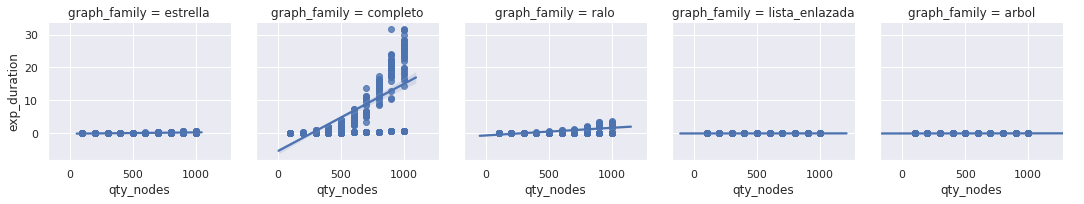

In [48]:
g = sns.FacetGrid(exp_df, col="graph_family")
g = (g.map(sns.regplot, "qty_nodes", "exp_duration")
     .add_legend())

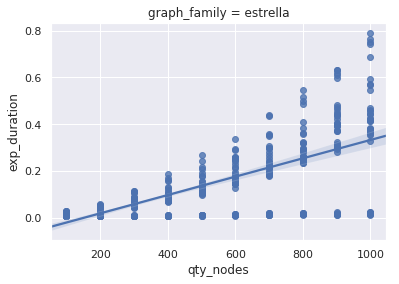

In [72]:
# estrella completo ralo lista_enlazada arbol

family = 'estrella'
g = sns.regplot(x="qty_nodes", 
            y="exp_duration", 
            data=exp_df[exp_df["graph_family"] == family]
           )
g.set_title('graph_family = {}'.format(family))

g.figure.savefig("./plots/qty_nodes_vs_time_{}.png".format(family))

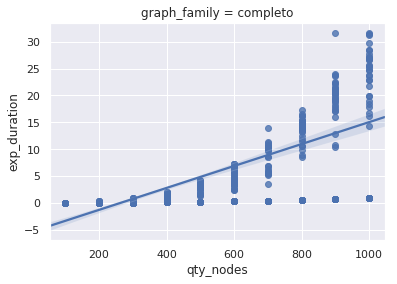

In [77]:
# estrella completo ralo lista_enlazada arbol

family = 'completo'
g = sns.regplot(x="qty_nodes", 
            y="exp_duration", 
            data=exp_df[exp_df["graph_family"] == family]
           )
g.set_title('graph_family = {}'.format(family))

g.figure.savefig("./plots/qty_nodes_vs_time_{}.png".format(family))

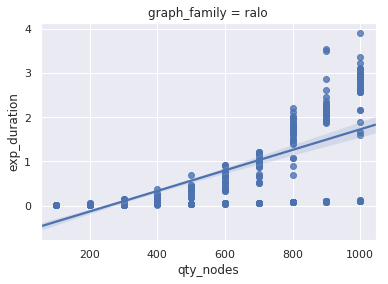

In [78]:
# estrella completo ralo lista_enlazada arbol

family = 'ralo'
g = sns.regplot(x="qty_nodes", 
            y="exp_duration", 
            data=exp_df[exp_df["graph_family"] == family]
           )
g.set_title('graph_family = {}'.format(family))

g.figure.savefig("./plots/qty_nodes_vs_time_{}.png".format(family))

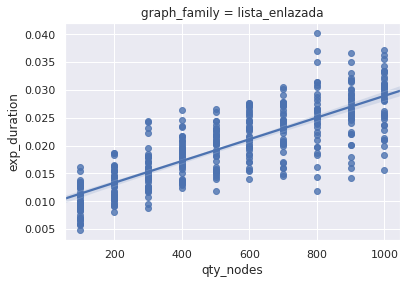

In [80]:
# estrella completo ralo lista_enlazada arbol

family = 'lista_enlazada'
g = sns.regplot(x="qty_nodes", 
            y="exp_duration", 
            data=exp_df[exp_df["graph_family"] == family]
           )
g.set_title('graph_family = {}'.format(family))

g.figure.savefig("./plots/qty_nodes_vs_time_{}.png".format(family))

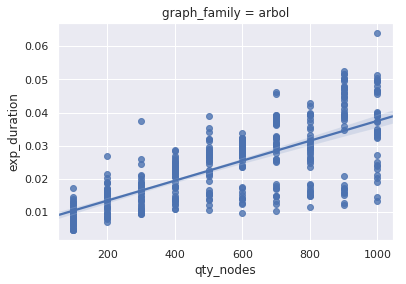

In [81]:
# estrella completo ralo lista_enlazada arbol

family = 'arbol'
g = sns.regplot(x="qty_nodes", 
            y="exp_duration", 
            data=exp_df[exp_df["graph_family"] == family]
           )
g.set_title('graph_family = {}'.format(family))

g.figure.savefig("./plots/qty_nodes_vs_time_{}.png".format(family))

### tiempo vs qty_edges

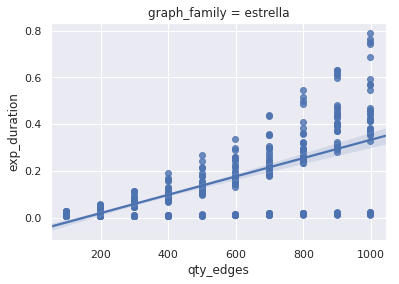

In [82]:
# estrella completo ralo lista_enlazada arbol

family = 'estrella'
g = sns.regplot(x="qty_edges", 
            y="exp_duration", 
            data=exp_df[exp_df["graph_family"] == family]
           )
g.set_title('graph_family = {}'.format(family))

g.figure.savefig("./plots/qty_edges_vs_time_{}.png".format(family))

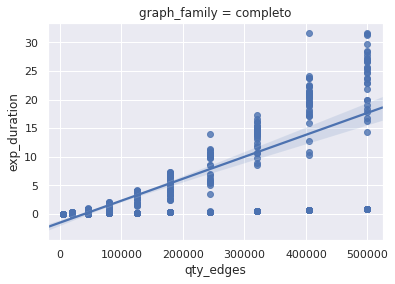

In [83]:
# estrella completo ralo lista_enlazada arbol

family = 'completo'
g = sns.regplot(x="qty_edges", 
            y="exp_duration", 
            data=exp_df[exp_df["graph_family"] == family]
           )
g.set_title('graph_family = {}'.format(family))

g.figure.savefig("./plots/qty_edges_vs_time_{}.png".format(family))

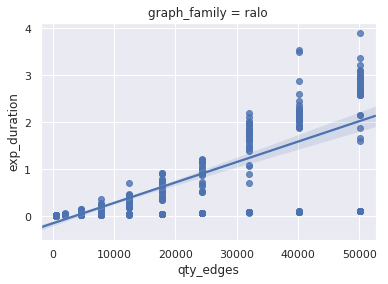

In [84]:
# estrella completo ralo lista_enlazada arbol

family = 'ralo'
g = sns.regplot(x="qty_edges", 
            y="exp_duration", 
            data=exp_df[exp_df["graph_family"] == family]
           )
g.set_title('graph_family = {}'.format(family))

g.figure.savefig("./plots/qty_edges_vs_time_{}.png".format(family))

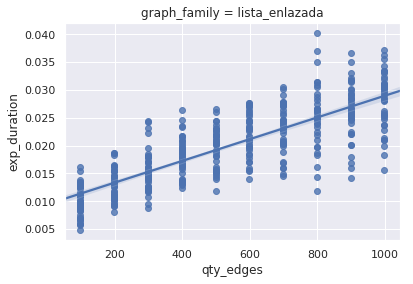

In [85]:
# estrella completo ralo lista_enlazada arbol

family = 'lista_enlazada'
g = sns.regplot(x="qty_edges", 
            y="exp_duration", 
            data=exp_df[exp_df["graph_family"] == family]
           )
g.set_title('graph_family = {}'.format(family))

g.figure.savefig("./plots/qty_edges_vs_time_{}.png".format(family))

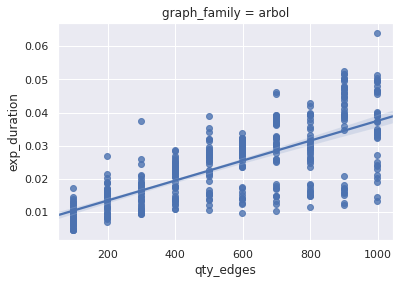

In [87]:
# estrella completo ralo lista_enlazada arbol

family = 'arbol'
g = sns.regplot(x="qty_edges", 
            y="exp_duration", 
            data=exp_df[exp_df["graph_family"] == family]
           )
g.set_title('graph_family = {}'.format(family))

g.figure.savefig("./plots/qty_edges_vs_time_{}.png".format(family))

### tiempo vs qty_threads

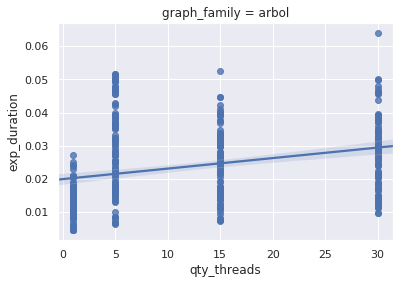

In [88]:
# estrella completo ralo lista_enlazada arbol

family = 'arbol'
g = sns.regplot(x="qty_threads", 
            y="exp_duration", 
            data=exp_df[exp_df["graph_family"] == family]
           )
g.set_title('graph_family = {}'.format(family))

g.figure.savefig("./plots/qty_threads_vs_time_{}.png".format(family))

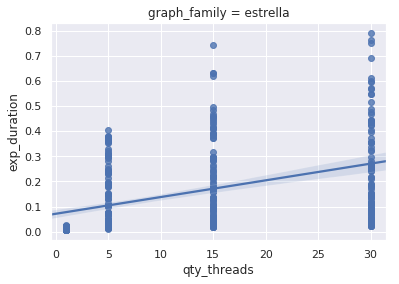

In [89]:
# estrella completo ralo lista_enlazada arbol

family = 'estrella'
g = sns.regplot(x="qty_threads", 
            y="exp_duration", 
            data=exp_df[exp_df["graph_family"] == family]
           )
g.set_title('graph_family = {}'.format(family))

g.figure.savefig("./plots/qty_threads_vs_time_{}.png".format(family))

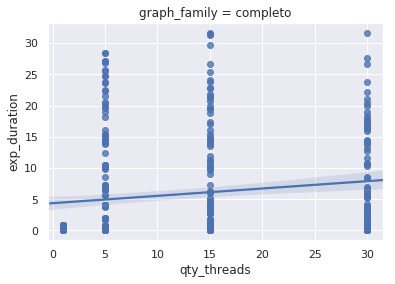

In [90]:
# estrella completo ralo lista_enlazada arbol

family = 'completo'
g = sns.regplot(x="qty_threads", 
            y="exp_duration", 
            data=exp_df[exp_df["graph_family"] == family]
           )
g.set_title('graph_family = {}'.format(family))

g.figure.savefig("./plots/qty_threads_vs_time_{}.png".format(family))

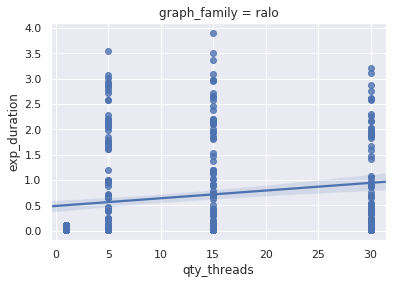

In [91]:
# estrella completo ralo lista_enlazada arbol

family = 'ralo'
g = sns.regplot(x="qty_threads", 
            y="exp_duration", 
            data=exp_df[exp_df["graph_family"] == family]
           )
g.set_title('graph_family = {}'.format(family))

g.figure.savefig("./plots/qty_threads_vs_time_{}.png".format(family))

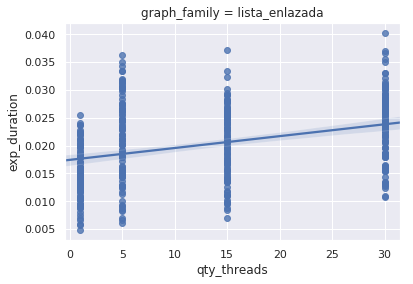

In [92]:
# estrella completo ralo lista_enlazada arbol

family = 'lista_enlazada'
g = sns.regplot(x="qty_threads", 
            y="exp_duration", 
            data=exp_df[exp_df["graph_family"] == family]
           )
g.set_title('graph_family = {}'.format(family))

g.figure.savefig("./plots/qty_threads_vs_time_{}.png".format(family))

### tiempo vs qty_merges

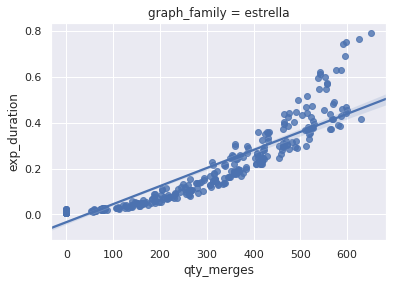

In [93]:
# estrella completo ralo lista_enlazada arbol

family = 'estrella'
g = sns.regplot(x="qty_merges", 
            y="exp_duration", 
            data=exp_df[exp_df["graph_family"] == family]
           )
g.set_title('graph_family = {}'.format(family))

g.figure.savefig("./plots/qty_merges_vs_time_{}.png".format(family))

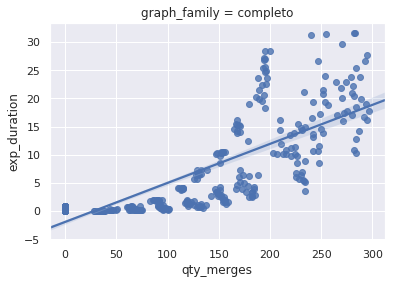

In [94]:
# estrella completo ralo lista_enlazada arbol

family = 'completo'
g = sns.regplot(x="qty_merges", 
            y="exp_duration", 
            data=exp_df[exp_df["graph_family"] == family]
           )
g.set_title('graph_family = {}'.format(family))

g.figure.savefig("./plots/qty_merges_vs_time_{}.png".format(family))

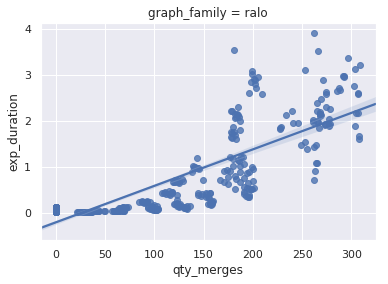

In [95]:
# estrella completo ralo lista_enlazada arbol

family = 'ralo'
g = sns.regplot(x="qty_merges", 
            y="exp_duration", 
            data=exp_df[exp_df["graph_family"] == family]
           )
g.set_title('graph_family = {}'.format(family))

g.figure.savefig("./plots/qty_merges_vs_time_{}.png".format(family))

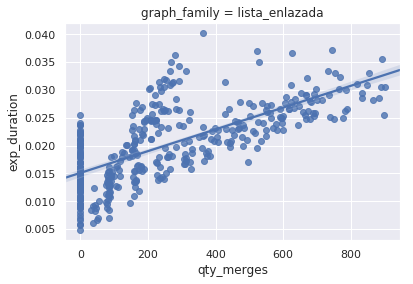

In [96]:
# estrella completo ralo lista_enlazada arbol

family = 'lista_enlazada'
g = sns.regplot(x="qty_merges", 
            y="exp_duration", 
            data=exp_df[exp_df["graph_family"] == family]
           )
g.set_title('graph_family = {}'.format(family))

g.figure.savefig("./plots/qty_merges_vs_time_{}.png".format(family))

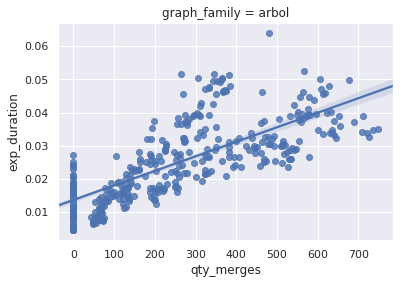

In [97]:
# estrella completo ralo lista_enlazada arbol

family = 'arbol'
g = sns.regplot(x="qty_merges", 
            y="exp_duration", 
            data=exp_df[exp_df["graph_family"] == family]
           )
g.set_title('graph_family = {}'.format(family))

g.figure.savefig("./plots/qty_merges_vs_time_{}.png".format(family))

### qty_merges por familia

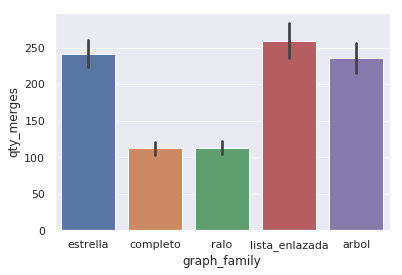

In [98]:
import seaborn as sns
ax = sns.barplot(x="graph_family", y="qty_merges", data=exp_df)
ax.figure.savefig("./plots/qty_merges_per_family.png")
